
# Air Quality Analysis

This notebook performs an exploratory data analysis (EDA) on air quality data. The data contains PM 2.5 readings from various cities over time. 
We will preprocess the data, visualize trends, and identify patterns to gain insights into pollution levels.

### Steps Covered:
1. Data Loading and Overview
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Outlier Detection and Seasonal Trends
5. Advanced Visualizations and Insights


In [2]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
file_path = 'aqi.csv' 
df = pd.read_csv(file_path)
df.head()

,Date,City,Type,Count
0,5/10/2019,Lahore,PM 2.5,231
1,5/11/2019,Lahore,PM 2.5,171
2,5/12/2019,Lahore,PM 2.5,209
3,5/13/2019,Lahore,PM 2.5,188
4,5/14/2019,Lahore,PM 2.5,194


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1367 non-null   object
 1   City    1367 non-null   object
 2   Type    1367 non-null   object
 3   Count   1367 non-null   object
dtypes: object(4)
memory usage: 42.8+ KB



## Data Preprocessing

We preprocess the data by:
1. Converting `Count` to numeric and `Date` to datetime.
2. Dropping invalid rows.
3. Checking for missing values and data types.


In [6]:
# Convert 'Count' to numeric
df['Count'] = pd.to_numeric(df['Count'], errors='coerce')

In [7]:
# Drop rows with invalid data
df = df.dropna(subset=['Date', 'Count'])

In [8]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [9]:
df.dtypes

Date     datetime64[ns]
City             object
Type             object
Count           float64
dtype: object

In [10]:
# Check for missing values after preprocessing
print(df.isnull().sum())

Date     0
City     0
Type     0
Count    0
dtype: int64



## Exploratory Data Analysis (EDA)

We analyze the following aspects of the data:
1. City-wise pollutant distribution (boxplot).
2. Time-series trends of PM 2.5 levels by city.
3. Distribution of pollutant levels across all cities (histogram).


/tmp/ipykernel_12276/2662616541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='City', y='Count', palette='Set2')


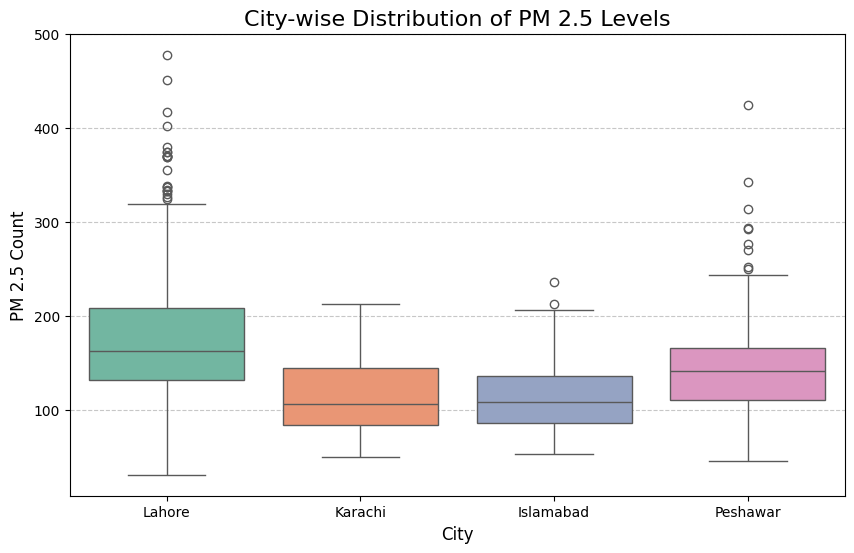

<Figure size 640x480 with 0 Axes>

In [11]:

# 1. City-wise distribution of pollutant levels (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='City', y='Count', palette='Set2')
plt.title('City-wise Distribution of PM 2.5 Levels', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('PM 2.5 Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.savefig("box.png")  # Save image directly


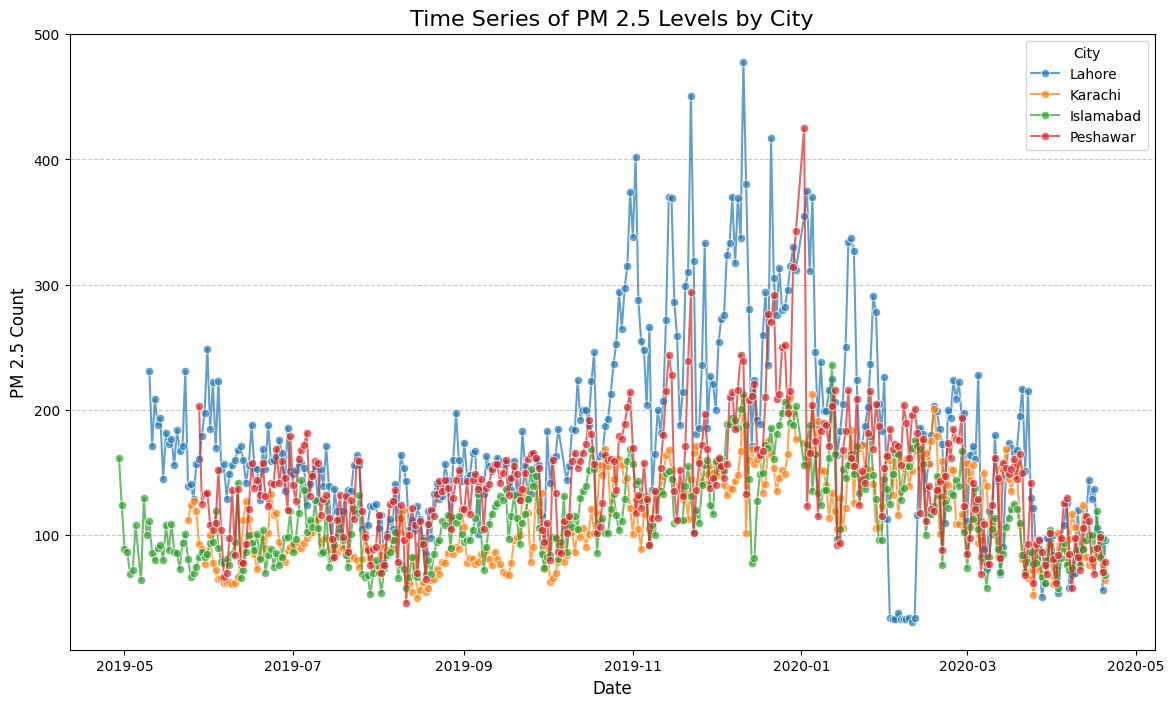

In [22]:
# 2. Time series of pollutant levels by city
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Date', y='Count', hue='City', marker='o', alpha=0.7, palette='tab10')
plt.title('Time Series of PM 2.5 Levels by City', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM 2.5 Count', fontsize=12)
plt.legend(title='City')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

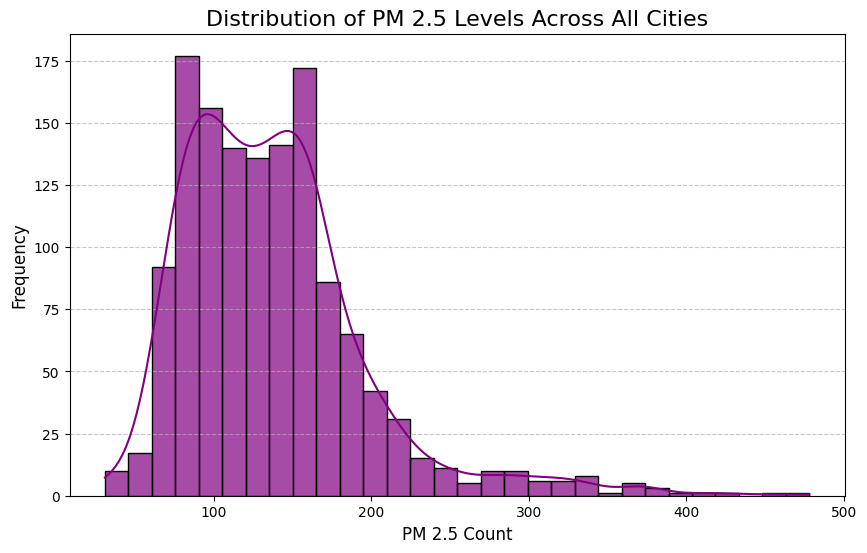

In [23]:

# 3. Histogram of pollutant levels across all cities
plt.figure(figsize=(10, 6))
sns.histplot(df['Count'], bins=30, kde=True, color='purple', alpha=0.7)
plt.title('Distribution of PM 2.5 Levels Across All Cities', fontsize=16)
plt.xlabel('PM 2.5 Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



## Outlier Detection and Seasonal Trends

We identify outliers using the 3-sigma rule (values beyond 3 standard deviations from the mean). Seasonal trends are analyzed by grouping data by months.


In [24]:

# Outlier Detection
mean_count = df['Count'].mean()
std_count = df['Count'].std()
outlier_threshold = mean_count + 3 * std_count

# Identify outliers
outliers = df[df['Count'] > outlier_threshold]
print("Outliers Detected:")
print(outliers)

Outliers Detected:
           Date      City    Type  Count  Month
173  2019-10-30    Lahore  PM 2.5  315.0     10
174  2019-10-31    Lahore  PM 2.5  374.0     10
175  2019-11-01    Lahore  PM 2.5  338.0     11
176  2019-11-02    Lahore  PM 2.5  402.0     11
188  2019-11-14    Lahore  PM 2.5  370.0     11
189  2019-11-15    Lahore  PM 2.5  369.0     11
196  2019-11-22    Lahore  PM 2.5  451.0     11
197  2019-11-23    Lahore  PM 2.5  319.0     11
201  2019-11-27    Lahore  PM 2.5  333.0     11
209  2019-12-05    Lahore  PM 2.5  324.0     12
210  2019-12-06    Lahore  PM 2.5  333.0     12
211  2019-12-07    Lahore  PM 2.5  370.0     12
212  2019-12-08    Lahore  PM 2.5  317.0     12
213  2019-12-09    Lahore  PM 2.5  369.0     12
214  2019-12-10    Lahore  PM 2.5  337.0     12
215  2019-12-11    Lahore  PM 2.5  478.0     12
216  2019-12-12    Lahore  PM 2.5  380.0     12
225  2019-12-21    Lahore  PM 2.5  417.0     12
232  2019-12-28    Lahore  PM 2.5  315.0     12
233  2019-12-29    La

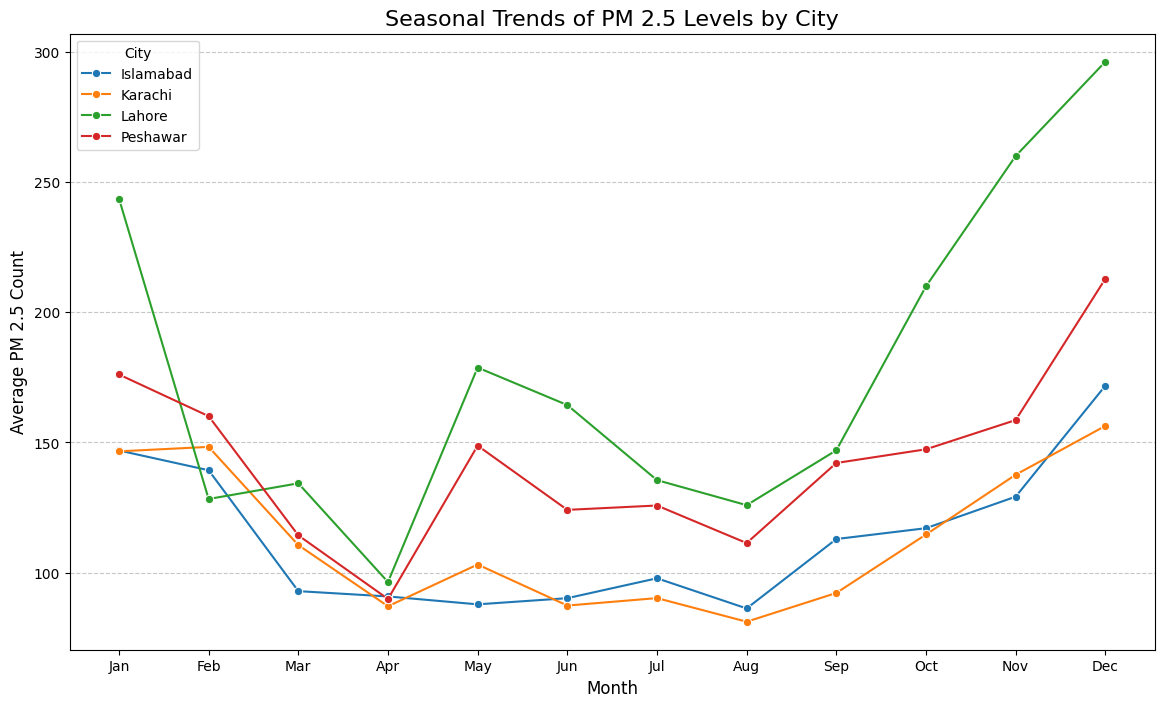

In [28]:
# Seasonal Trends
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby(['City', 'Month'])['Count'].mean().reset_index()

# Seasonal trends by city
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_avg, x='Month', y='Count', hue='City', marker='o', palette='tab10')
plt.title('Seasonal Trends of PM 2.5 Levels by City', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average PM 2.5 Count', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='City')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
# Extract additional features
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2]
                                 else 'Spring' if x in [3, 4, 5]
                                 else 'Summer' if x in [6, 7, 8]
                                 else 'Autumn')

/tmp/ipykernel_34803/3433222069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Season', y='Count', palette='coolwarm')


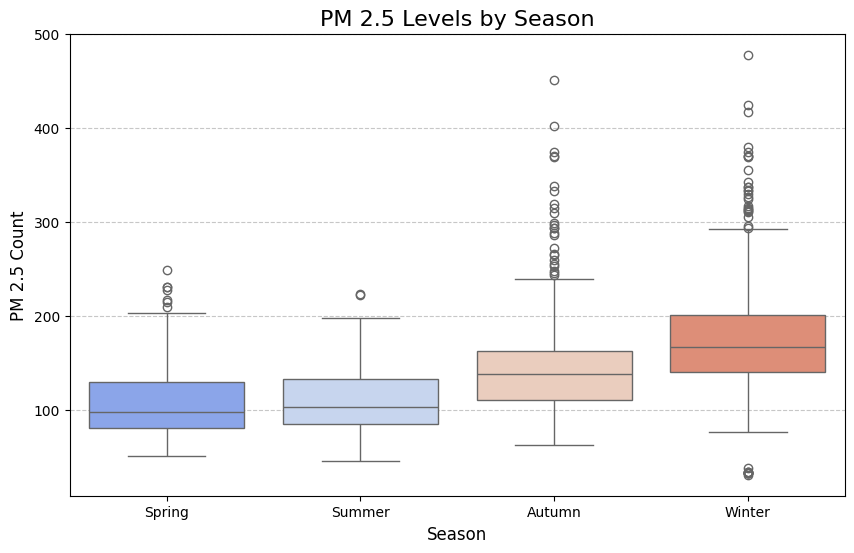

In [30]:
# Exploratory Data Analysis (EDA)

# 1. Boxplot of PM 2.5 Levels by Season
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Season', y='Count', palette='coolwarm')
plt.title('PM 2.5 Levels by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('PM 2.5 Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


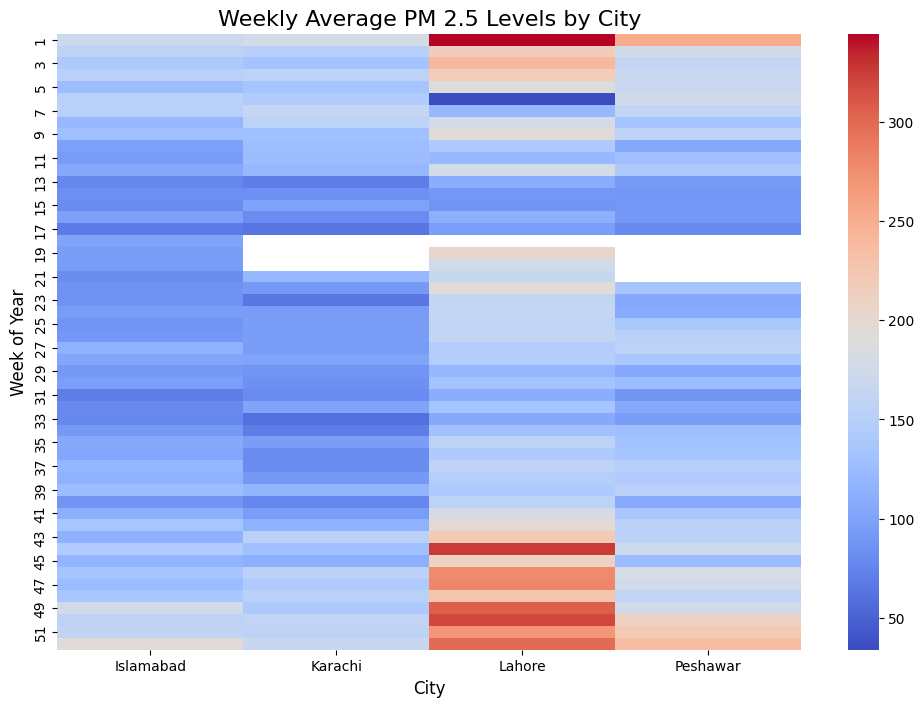

In [31]:
# 2. Heatmap of Weekly Trends
weekly_data = df.groupby(['Week', 'City'])['Count'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(weekly_data, cmap='coolwarm', annot=False)
plt.title('Weekly Average PM 2.5 Levels by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Week of Year', fontsize=12)
plt.show()


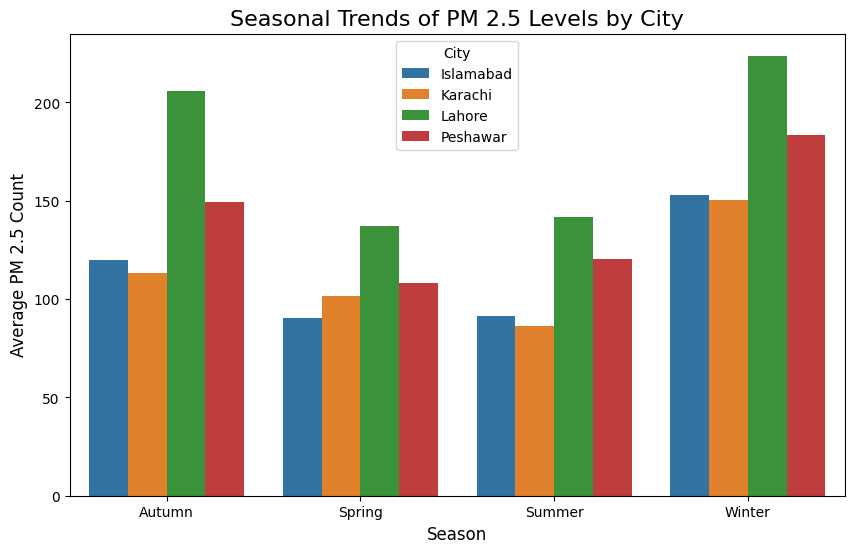

In [32]:

# 3. Seasonal Trends by City
seasonal_avg = df.groupby(['City', 'Season'])['Count'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_avg, x='Season', y='Count', hue='City', palette='tab10')
plt.title('Seasonal Trends of PM 2.5 Levels by City', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average PM 2.5 Count', fontsize=12)
plt.legend(title='City')
plt.show()

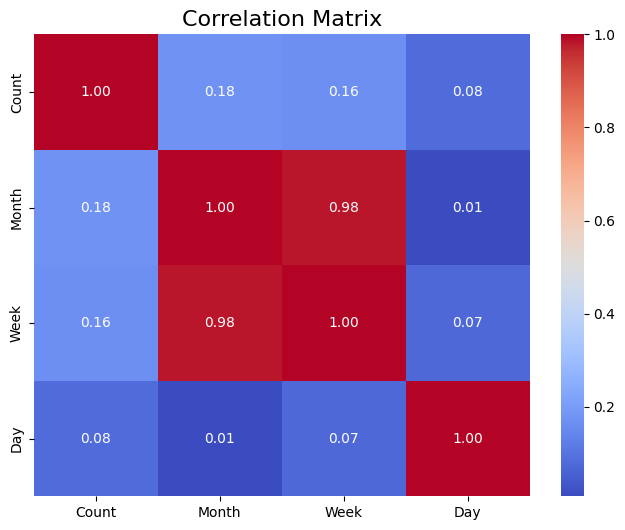

In [33]:
# 4. Correlation Heatmap
# Check correlations between numerical and derived features
corr_features = df[['Count', 'Month', 'Week', 'Day']]
correlation = corr_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()